# Netflix Data Analysis Project  

1. Numpy llibrary for mathmatical operations 
2. Pandas library for data cleaning 
3. Matplotlib library to plot charts 
4. Seaborn library to plot charts 

In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [109]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [110]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [112]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [113]:
df.duplicated().sum()

0

In [114]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [115]:
df.describe(include='all')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
count,9837,9828,9828,9827.000000,9827,9827,9827,9826,9837
unique,5903,9514,9823,NaN,3267,75,44,2337,9827
top,10-03-2022,Beauty and the Beast,Dr. Raichi is one of the only survivors of the...,NaN,0,6.4,en,Drama,\r
freq,16,4,2,NaN,100,435,7569,466,11
mean,NaN,NaN,NaN,40.320570,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,108.874308,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.127500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.191000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.174500,NaN,NaN,NaN,NaN,NaN


=> Exploration Summary 

1. Dataframe consisting of 9827 rows and 9 columns 
2. Tidy dataset with neighter NaNs nor duplicated values 
3. Release_Date column needs data type change to date time and needs to extract only year value 
4. Overview, Original_Language and Poster_Url\r column wouldn't be useful during analysis so drop them 
5. There are noticiable outliers in Popularity column 
6. Vote_Average column needs to be categorised for proper analysis 
7. Genre column has comma seprated values and white spaces that needs to be handled and casted into categories 

Release_Date column needs data type change to date time and needs to extract only year value

In [116]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], dayfirst=True, errors='coerce') 

print(df['Release_Date'].dtypes)

datetime64[ns]


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   object        
 5   Vote_Average       9827 non-null   object        
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
        9837 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 691.8+ KB


In [118]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('float64')

In [119]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [120]:
df['Release_Date'] = pd.to_numeric(df['Release_Date'], errors='coerce')
df['Release_Date'] = df['Release_Date'].fillna(0).astype(int)

In [121]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping columns: Overview, Original_Language and Poster_Url 

In [122]:
cols = ['Overview', 'Original_Language', 'Poster_Url\r'] 

In [123]:
df.drop(cols, axis = 1, inplace = True) 

In [124]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [125]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


Vote_Average column needs to be categorised for proper analysis. 
Make 4 Labels:  
1. Popular 
2. Average 
3. Below Average 
4. Not popular 

In [126]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [127]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [128]:
def categorize_col(df, col, labels): 
    edges = [df[col].describe()['min'], 
            df[col].describe()['25%'], 
            df[col].describe()['50%'], 
            df[col].describe()['75%'], 
            df[col].describe()['max']] 
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop') 
    return df 

In [129]:
labels = ['not_popular', 'below_avg', 'average', 'popular'] 

categorize_col(df, 'Vote_Average', labels) 

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [130]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [131]:
df.describe()

,Release_Date,Popularity
count,9837.000000,9827.000000
mean,2004.164176,40.320570
std,65.829992,108.874308
min,0.000000,7.100000
25%,2000.000000,16.127500
50%,2011.000000,21.191000
75%,2017.000000,35.174500
max,2024.000000,5083.954000


In [132]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

Tidy dataset with neighter NaNs nor duplicated values 

In [133]:
df.isna().sum() 

Release_Date      0
Title             9
Popularity       10
Vote_Count       10
Vote_Average    111
Genre            11
dtype: int64

In [134]:
df.dropna(inplace = True) 
df.isna().sum() 

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

Genre column has comma seprated values and white spaces that needs to be handled and casted into categories 

In [135]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [136]:
df['Genre'] = df['Genre'].str.split(', ') 

df = df.explode('Genre').reset_index(drop = True) 
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [138]:
# Casting column into category 

df['Genre'] = df['Genre'].astype('category') 

df['Genre'].dtypes 

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  object  
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(1), object(2)
memory usage: 749.6+ KB


In [142]:
df.nunique( )

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now, Data is cleaned and preprocesed and is ready to analyse and visualize. 

In [143]:
# Data Visualization 

sns.set_style('whitegrid') 

Q. 1 What is the most frequent genre of movies released on Netflix? 

In [145]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

C:\Users\krish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


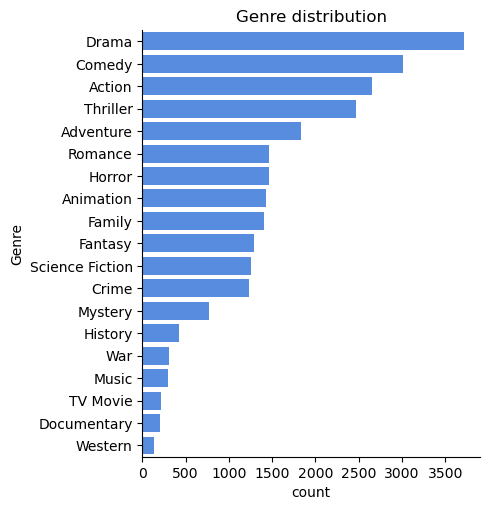

In [148]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index, 
            color = '#4287f5') 
plt.title('Genre distribution') 
plt.show() 

Q. 2 Which genre has highest votes in vote avg column? 

C:\Users\krish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


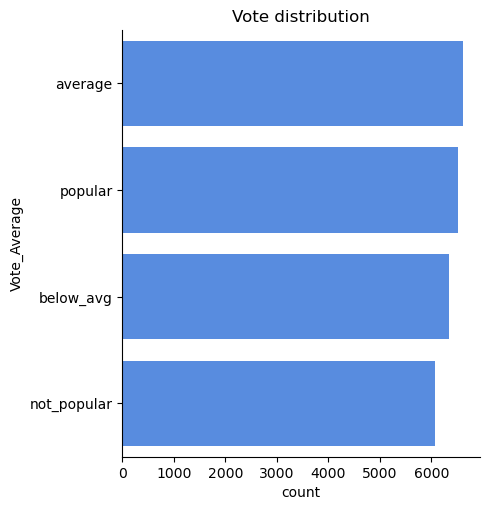

In [150]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', 
           order = df['Vote_Average'].value_counts().index, 
           color = '#4287f5') 
plt.title('Vote_Average distribution') 

plt.show() 

Q. 3 Which movie got the highest popularity? What's its Genre? 

In [152]:
df.head(2) 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [153]:
df[df['Popularity'] == df['Popularity'].max()] 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Q. 4 Which movie got the lowest popularity? What's its Genre? 

In [154]:
df[df['Popularity'] == df['Popularity'].min()] 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


Q. 5 Which year has the most filmmed movies? 

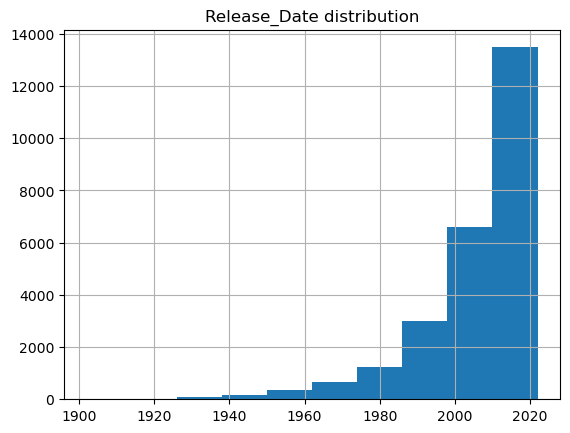

In [156]:
df['Release_Date'].hist() 
plt.title('Release_Date distribution') 

plt.show() 

=> Summary: 

Q. 1 What is the most frequent genre of movies released on Netflix? 
A. Drama genre is the most frequent genre in our dataset and has appeared for more than 14% of the times among 19 other genres. 

Q. 2 Which genre has highest votes in vote avg column? 
A. We have 25.5% of our dataset with popular vote (6520 rows). Drama genre gets the highest popularity among fans by being having more than 18.5% movies 

Q. 3 Which movie got the highest popularity? What's its Genre? 
A. Spider-Man: No Way Home has the highest popularity rate in the dataset and it has genres of Action, Adventure and Science Finction. 

Q. 4 Which movie got the lowest popularity? What's its Genre? 
A. The United States vs. Billie Holiday and Threads has the lowest popularity rate in the dataset and it has genres of Music, Drama, History and War, Drama, Sci-Fi. 

Q. 5 Which year has the most filmmed movies? 
A. Year 2020 has the highest filmming rate in the dataset. 
